In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib
import analyze # takes some time since inits hax
from channel_dict import channel_dict
from tqdm import tqdm
import datetime
import pickle
from scipy.stats import norm
import shutil

%matplotlib inline

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_v6.8.0/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_v6.8.0/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import hax
#hax already initiated when analyze is imported

from spe_acceptance import data_dir_base, rawdata_dir


def data_exists(run_number):
    data_path=os.path.join(data_dir_base, 'run_%05d.h5' %int(run_number))
    return os.path.exists(data_path)

def all_data_exists(runlist):
    return all([data_exists(run) for run in runlist])

def file_to_list(runlist_file):
    return [int(run) for run in runlist_file.split('.')[0].split('_')[1:4]]

def get_run_time(run):
    return hax.runs.datasets[hax.runs.datasets.number == run].start.values[0]
    
def find_file(run):
    return [f for f in os.listdir('runlists') if any(int(run)==elem for elem in file_to_list(f))]

### Contour Plot

In [18]:
test_runlists=['runlist_18286_18287_18288.txt', 'runlist_17939_17940_17942.txt', 'runlist_18846_18847_18848.txt']
test_ch=[0,126,245]
runlists = [f for f in os.listdir('./runlists')]
qval=-25
ampval=6

q_acc_dict={}
amp_acc_dict={}

q_occ_dict={}
amp_occ_dict={}

#error dicts

q_acc_lerrs={}
q_acc_uerrs={}

amp_acc_lerrs={}
amp_acc_uerrs={}

q_occ_errs={}

amp_occ_errs={}

q_on_ch={}
amp_on_ch={}

bottom_runs=[]

with open('/project/lgrandi/xenon1t/spe_acceptance/ch_data/ch_data.pkl', 'rb') as cd:
    if os.stat('/project/lgrandi/xenon1t/spe_acceptance/ch_data/ch_data.pkl').st_size==0:
        print('No data in pickle file')
        data=[]
    else:
        data=pickle.load(cd)
saved_runlists=[]


for cd in data:
    if len(data)==0:
        continue
        
    runlist = file_to_list(cd.runlist)
    if not all_data_exists(runlist):
        resubmit_files.append(cd.runlist)
        for r in runs:
            if not data_exists(r):
                missing_runs.append(r)
        continue    
          
    saved_runlists.append(cd.runlist)
    
    
    amp_acc=cd.acc
    amp_acc_errs_l=cd.acc_errs_l
    amp_acc_errs_u=cd.acc_errs_u
    amp_acc_sys=cd.acc_sys
    amp_acc_stat=cd.acc_stat
    amp_occ=cd.occ
    amp_occ_sys=cd.occ_sys
    amp_occ_stat=cd.occ_stat
    amp_on_channels = cd.on_channels
    
    amp_on_ch[cd.runlist]=amp_on_channels
      
    
    bottom_run = runlist[0]
    topbulk_run = runlist[1]
    topring_run = runlist[2]
    
    bottom_runs.append(bottom_run)
    
    amp_acc_dict[cd.runlist]=amp_acc
    amp_occ_dict[cd.runlist]=amp_occ

    on_acc=amp_acc[amp_on_channels]

    #make error dicts
    amp_acc_lerrs[cd.runlist]=amp_acc_errs_l
    amp_acc_uerrs[cd.runlist]=amp_acc_errs_u
    
    amp_occ_errs[cd.runlist]=np.sqrt(amp_occ_stat**2+amp_occ_sys**2)
    
print("Amp data already exists for: ", saved_runlists)

Amp data already exists for:  ['runlist_9549_9550_9551.txt', 'runlist_9549_9550_9551.txt', 'runlist_12587_12588_12589.txt', 'runlist_7350_7351_7352.txt', 'runlist_6909_6910_6911.txt', 'runlist_6550_6551_6552.txt', 'runlist_7067_7068_7069.txt', 'runlist_12768_12769_12770.txt', 'runlist_11429_11430_11431.txt', 'runlist_7447_7448_7449.txt', 'runlist_16984_16985_16986.txt', 'runlist_10696_10697_10698.txt', 'runlist_6957_6958_6959.txt', 'runlist_12046_12047_12048.txt', 'runlist_17454_17455_17456.txt', 'runlist_7968_7969_7970.txt', 'runlist_7646_7647_7648.txt', 'runlist_11625_11626_11627.txt', 'runlist_17998_17999_18000.txt', 'runlist_10133_10134_10135.txt', 'runlist_8448_8449_8450.txt', 'runlist_7758_7759_7760.txt', 'runlist_6938_6939_6940.txt', 'runlist_16343_16344_16345.txt', 'runlist_9604_9605_9606.txt', 'runlist_9033_9034_9036.txt', 'runlist_7485_7486_7487.txt', 'runlist_11069_11070_11071.txt', 'runlist_7569_7570_7571.txt', 'runlist_16701_16702_16703.txt', 'runlist_8921_8922_8923.txt', 

In [19]:
analyze.occupancy(18286, val2corr2=6, space='amplitude')

/home/awalsh272/SPE/SPE/analyze.py:85: RuntimeWarning: invalid value encountered in true_divide
  sigma_corr_noise=corr_noise*np.sqrt( (sigma_corr/corrections)**2 + (sigma_noise/noise)**2)


sc:  [ 0.00342401  0.00382187  0.00387172  0.00329791  0.00359761  0.00336023
  0.00403579  0.00320542  0.0032692   0.00340728  0.00327698  0.00338056
  0.00350958  0.00332532  0.00324201  0.00328034  0.00322712  0.00320272
  0.00319582  0.00350415  0.00341218  0.0035801   0.00319266  0.00323346
  0.00330892  0.00328538  0.0034455   0.00320384  0.00321229  0.00323821
  0.00316677  0.00344818  0.00353164  0.00325649  0.00331311  0.00354338
  0.00368998  0.00341161  0.00355626  0.00401002  0.00365941  0.00341345
  0.00313424  0.00348046  0.00321459  0.00331216  0.00343647  0.00344242
  0.00322014  0.00328579  0.00323895  0.00313109  0.00325291  0.00324726
  0.00375564  0.0034478   0.00335993  0.00315475  0.00333343  0.00316665
  0.00322468  0.00339854  0.00345283  0.00328511  0.00357035  0.00356354
  0.00423119  0.00354463  0.00333133  0.00380779  0.00340976  0.00347657
  0.00343914  0.00307642  0.00316556  0.00322729  0.00341714  0.00336579
  0.0031951   0.00323818  0.00331256  0.003389

(array([ 0.03341427, -0.01285822, -0.01734728,  0.02535299,  0.04259455,
         0.04655076,  0.05541602,  0.03381953,  0.02951385,  0.03117126,
         0.03395143,  0.03523565,  0.03292303,  0.02882153,  0.02487064,
         0.02991882,  0.0340305 ,  0.03084109,  0.03590001,  0.00215468,
         0.01022962,  0.01760596,  0.03325027,  0.04536342,  0.02672533,
         0.03496924, -0.00332473,  0.04746312,  0.02966529,  0.03445977,
         0.02948043,  0.02906329,  0.02455343,  0.03384867,  0.03017359,
         0.02850449,  0.04616107,  0.02850002,  0.05205696,  0.04706913,
         0.05664232,  0.0692411 ,  0.05277476,  0.05703922,  0.04585547,
         0.04989474,  0.03757404,  0.04560417,  0.04109858,  0.03449123,
         0.04606418,  0.04777038,  0.03318705,  0.04749122, -0.00147468,
         0.03547545,  0.0155479 ,  0.04353662,  0.04409714,  0.04728132,
         0.05375806,  0.03557299,  0.00569757,  0.04727336,  0.05332268,
         0.00527847,  0.04009859,  0.07122055,  0.0

In [20]:
with open('/project/lgrandi/xenon1t/spe_acceptance/ch_data/q_ch_data.pkl', 'rb') as qcd:
    if os.stat('/project/lgrandi/xenon1t/spe_acceptance/ch_data/q_ch_data.pkl').st_size==0:
        print('No data in pickle file')
        q_data=[]
    else:
        q_data=pickle.load(qcd)
        
q_saved_runlists=[]

for cd in q_data:
    if len(q_data)==0:
        continue
        
    runlist = file_to_list(cd.runlist)
    if not all_data_exists(runlist):
        resubmit_files.append(cd.runlist)
        for r in runs:
            if not data_exists(r):
                missing_runs.append(r)
        continue    
          
    q_saved_runlists.append(cd.runlist)
    
    
    q_acc=cd.acc
    q_acc_errs_l=cd.acc_errs_l
    q_acc_errs_u=cd.acc_errs_u
    q_acc_sys=cd.acc_sys
    q_acc_stat=cd.acc_stat
    q_occ=cd.occ
    q_occ_sys=cd.occ_sys
    q_occ_stat=cd.occ_stat
    q_on_channels = cd.on_channels

    q_on_ch[cd.runlist]=q_on_channels
      
    bottom_run = runlist[0]
    topbulk_run = runlist[1]
    topring_run = runlist[2]
    
    bottom_runs.append(bottom_run)
    
    q_acc_dict[cd.runlist]=q_acc
    q_occ_dict[cd.runlist]=q_occ

    #on_acc=q_acc[q_on_channels]

    #make error dicts
    q_acc_lerrs[cd.runlist]=q_acc_errs_l
    q_acc_uerrs[cd.runlist]=q_acc_errs_u
    
    q_occ_errs[cd.runlist]=np.sqrt(q_occ_stat**2+q_occ_sys**2)
    
print("Q data already exists for: ", q_saved_runlists)

Q data already exists for:  ['runlist_9549_9550_9551.txt', 'runlist_9549_9550_9551.txt', 'runlist_12587_12588_12589.txt', 'runlist_7350_7351_7352.txt', 'runlist_6909_6910_6911.txt', 'runlist_6550_6551_6552.txt', 'runlist_7067_7068_7069.txt', 'runlist_12768_12769_12770.txt', 'runlist_11429_11430_11431.txt', 'runlist_7447_7448_7449.txt', 'runlist_16984_16985_16986.txt', 'runlist_10696_10697_10698.txt', 'runlist_6957_6958_6959.txt', 'runlist_12046_12047_12048.txt', 'runlist_17454_17455_17456.txt', 'runlist_7968_7969_7970.txt', 'runlist_7646_7647_7648.txt', 'runlist_11625_11626_11627.txt', 'runlist_17998_17999_18000.txt', 'runlist_10133_10134_10135.txt', 'runlist_8448_8449_8450.txt', 'runlist_7758_7759_7760.txt', 'runlist_6938_6939_6940.txt', 'runlist_16343_16344_16345.txt', 'runlist_9604_9605_9606.txt', 'runlist_9033_9034_9036.txt', 'runlist_7485_7486_7487.txt', 'runlist_11069_11070_11071.txt', 'runlist_7569_7570_7571.txt', 'runlist_16701_16702_16703.txt', 'runlist_8921_8922_8923.txt', 'r

In [ ]:
for runlist in tqdm(runlists):
    runs=file_to_list(runlist)
    if not all_data_exists(runs):
        print('Not all data for %s' %runlist)
        continue
    bot_run=runs[0]
    topb_run=runs[1]
    topr_run=runs[2]
    
    bottom_runs.append(bot_run)
    
    #find all the acc data, then put it in dictionaries
    thresholds = analyze.get_thresholds(analyze.find_regular_run(bot_run))
    
    q_acc, q_acc_stat, q_acc_sys=analyze.acceptance_3runs(bot_run, topb_run, topr_run, thresholds, val2corr2=qval, space='charge')
    
    q_acc_dict[runlist]=q_acc
    
    acc_lerrs=np.sqrt(q_acc_stat[0]**2+q_acc_sys**2)
    acc_uerrs=np.sqrt(q_acc_stat[1]**2+q_acc_sys**2)
    
    q_acc_lerrs[runlist]=acc_lerrs
    q_acc_uerrs[runlist]=acc_uerrs
    
    #find all the occ data, then put it in dictionaries
    q_occ, q_occ_sys, q_occ_stat=analyze.occupancy_3runs(bot_run, topb_run, topr_run, val2corr2=qval, space='charge')
    
    
    q_occ_dict[runlist]=q_occ

    q_occ_lerrs[runlist]=np.sqrt(q_occ_stat**2+q_occ_sys**2)
    
    #on channel dicts
    
    q_on_channels=np.where(q_occ>0.05)[0]
    
    q_on_ch[runlist]=q_on_channels
    
    cd=analyze.ch_data(runlist, get_run_time(bottom_run), q_acc, acc_lerrs, acc_uerrs, q_acc_sys, q_acc_stat, q_occ, q_occ_sys, q_occ_stat, q_on_channels)
    data.append(cd)
    
from spe_acceptance import change_permissions

os.remove('/project/lgrandi/xenon1t/spe_acceptance/ch_data/q_ch_data.pkl')
with open('/project/lgrandi/xenon1t/spe_acceptance/ch_data/q_ch_data.pkl', 'wb') as cd:
    pickle.dump(data, cd)
change_permissions('/project/lgrandi/xenon1t/spe_acceptance/ch_data/q_ch_data.pkl')    

In [21]:
#Turn all the dictionaries into dataframes

q_acc_df=pd.DataFrame(q_acc_dict)
amp_acc_df=pd.DataFrame(amp_acc_dict)

q_occ_df=pd.DataFrame(q_occ_dict)
amp_occ_df=pd.DataFrame(amp_occ_dict)

q_acc_lerr_df=pd.DataFrame(q_acc_lerrs)
q_acc_uerr_df=pd.DataFrame(q_acc_uerrs)

amp_acc_lerr_df=pd.DataFrame(amp_acc_lerrs)
amp_acc_uerr_df=pd.DataFrame(amp_acc_uerrs)

q_occ_err_df=pd.DataFrame(q_occ_errs)

amp_occ_err_df=pd.DataFrame(amp_occ_errs)

q_occ_df

,runlist_10064_10065_10066.txt,runlist_10133_10134_10135.txt,runlist_10297_10298_10299.txt,runlist_10524_10525_10526.txt,runlist_10610_10611_10612.txt,runlist_10696_10697_10698.txt,runlist_10796_10797_10798.txt,runlist_10877_10878_10879.txt,runlist_10986_10987_10988.txt,runlist_11069_11070_11071.txt,...,runlist_8840_8841_8842.txt,runlist_8921_8922_8923.txt,runlist_9033_9034_9036.txt,runlist_9112_9113_9114.txt,runlist_9217_9218_9219.txt,runlist_9299_9300_9301.txt,runlist_9549_9550_9551.txt,runlist_9604_9605_9606.txt,runlist_9697_9698_9699.txt,runlist_9797_9798_9799.txt
0,0.223036,0.226754,0.223230,0.227118,0.224728,0.222833,0.224954,0.223820,0.227985,0.230356,...,0.218441,0.217661,0.215288,0.217082,0.227150,0.225245,0.219857,0.224659,0.226046,0.214342
1,0.003518,0.003984,0.005435,0.009726,0.009805,-0.000918,0.001454,0.001831,-0.001112,0.009220,...,-0.000747,-0.002306,-0.007661,-0.014220,0.003921,0.003149,-0.006567,0.004112,0.002841,-0.011805
2,0.006007,0.012253,0.005669,0.013779,0.002863,0.003491,0.006643,0.010968,0.043156,0.033734,...,0.009584,0.005444,-0.000525,-0.000687,0.013372,0.010909,0.002137,0.025140,0.016146,0.014299
3,0.211616,0.212638,0.217249,0.210852,0.212611,0.206667,0.205434,0.212165,0.221790,0.199517,...,0.205658,0.203359,0.196496,0.197781,0.206996,0.207409,0.202527,0.203957,0.206206,0.199374
4,0.248111,0.248569,0.248577,0.247828,0.248714,0.252353,0.250824,0.254523,0.244411,0.259720,...,0.244720,0.240911,0.231470,0.233337,0.242488,0.244204,0.238980,0.240943,0.246822,0.255975
5,0.207616,0.210947,0.211001,0.203600,0.200676,0.199035,0.206446,0.199001,0.198354,0.184580,...,0.199642,0.192657,0.192558,0.189443,0.210515,0.205079,0.195975,0.229905,0.212404,0.301986
6,0.204174,0.205625,0.197795,0.204772,0.199969,0.206940,0.212195,0.203544,0.198074,0.296903,...,0.205063,0.193646,0.187355,0.187387,0.186372,0.209111,0.190784,0.193666,0.200992,0.184144
7,0.178827,0.180102,0.182941,0.181719,0.179321,0.180303,0.178311,0.176742,0.180615,0.181650,...,0.176232,0.172401,0.168570,0.168491,0.181749,0.178463,0.175304,0.178774,0.178526,0.182963
8,0.174864,0.182063,0.179205,0.178484,0.174494,0.179258,0.181089,0.181114,0.180334,0.163012,...,0.178061,0.172699,0.167762,0.167467,0.178405,0.177810,0.175577,0.174494,0.177668,0.169089
9,0.182725,0.189234,0.187614,0.187574,0.185584,0.183571,0.183189,0.182349,0.189845,0.181207,...,0.184143,0.181703,0.174308,0.175583,0.185333,0.186478,0.178755,0.176220,0.183313,0.174806


In [7]:
amp_vals=[i for i in range(3,20)]   
q_vals=[i for i in range(-60,10)]

def make_occ_ratio(run, ch, amp_vals, q_vals):
    
    s=analyze.SPE(os.path.join(data_dir_base, 'run_%d.h5' %run))
    amp_occ_dict={}
    q_occ_dict={}

    amp_occ_array=np.ones((len(amp_vals)))
    q_occ_array=np.ones((len(q_vals)))

    ratio_df=pd.DataFrame(0, index=q_vals, columns=amp_vals)

    for a,a_val in enumerate(amp_vals):        
        amp_corrs, amp_corr_errs=s.make_correction(a_val, 'amplitude')
        amp_corr=amp_corrs[ch]
        amp_occ_array[a]=-1*np.log(amp_corr)
        
        for q, q_val in enumerate(q_vals):
            q_corrs, q_corr_errs=s.make_correction(q_val, 'charge')
            q_corr=q_corrs[ch]
            q_occ_array[q]=-1*np.log(q_corr)        
            ratio_df.loc[q_val,a_val]=q_occ_array[q]/amp_occ_array[a]

    return ratio_df

  0%|          | 0/3 [00:00<?, ?it/s]
0it [00:00, ?it/s]/home/awalsh272/SPE/SPE/analyze.py:85: RuntimeWarning: invalid value encountered in true_divide
  sigma_corr_noise=corr_noise*np.sqrt( (sigma_corr/corrections)**2 + (sigma_noise/noise)**2)
/home/awalsh272/SPE/SPE/analyze.py:62: RuntimeWarning: divide by zero encountered in true_divide
  corr=led_firstN / noise_firstN
/home/awalsh272/SPE/SPE/analyze.py:63: RuntimeWarning: invalid value encountered in true_divide
  sigma_corr=corr*np.sqrt((sigma_led_firstN/led_firstN)**2 + (sigma_noise_firstN/noise_firstN)**2)


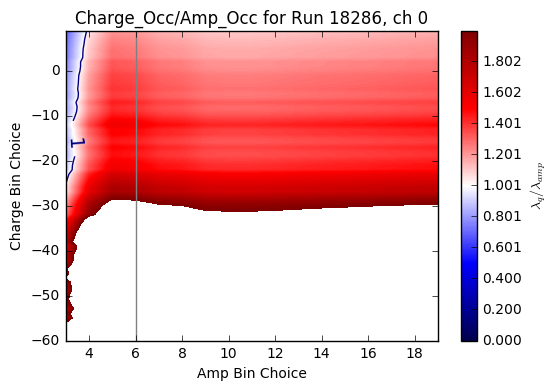


1it [00:07,  7.20s/it]

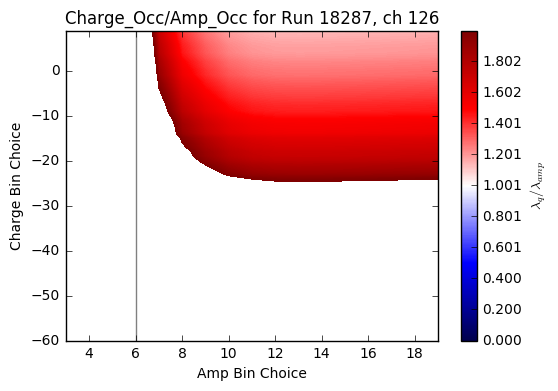


2it [00:13,  7.03s/it]/home/awalsh272/SPE/SPE/analyze.py:62: RuntimeWarning: invalid value encountered in true_divide
  corr=led_firstN / noise_firstN


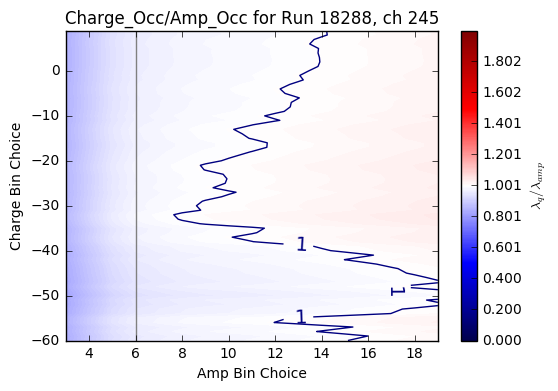


3it [00:20,  6.94s/it]
 33%|███▎      | 1/3 [00:20<00:41, 20.56s/it]
0it [00:00, ?it/s]

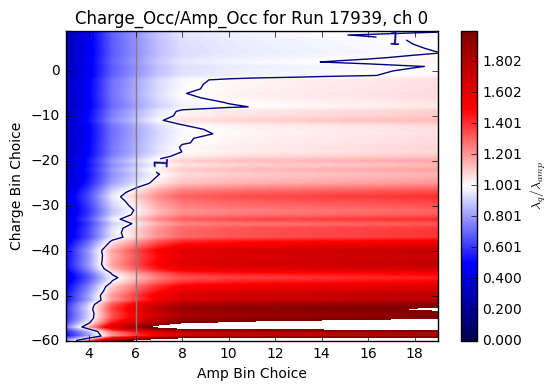


1it [00:07,  7.36s/it]

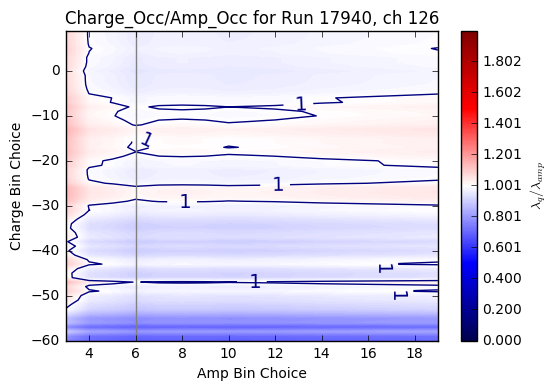


2it [00:14,  7.31s/it]

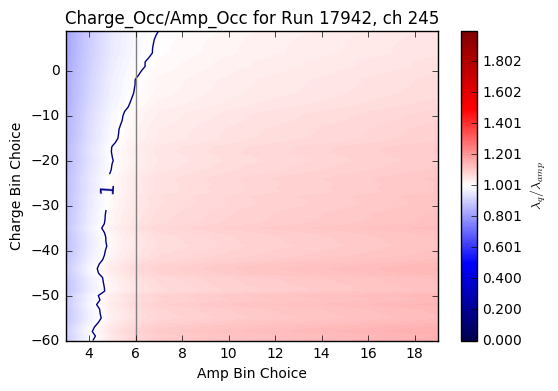


3it [00:21,  7.21s/it]
 67%|██████▋   | 2/3 [00:42<00:20, 20.85s/it]
0it [00:00, ?it/s]

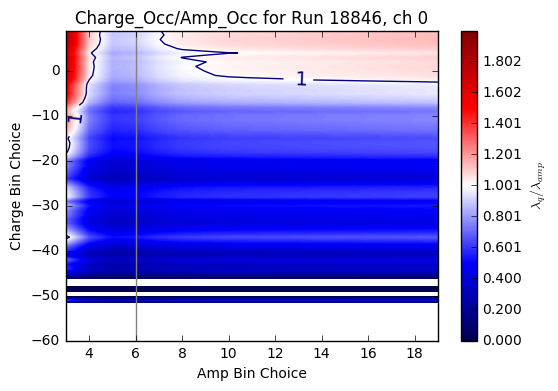


1it [00:07,  7.03s/it]

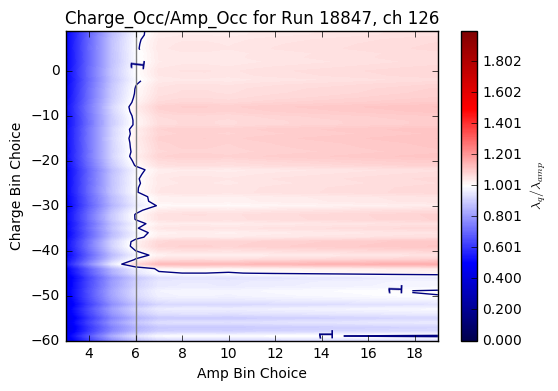


2it [00:13,  6.95s/it]

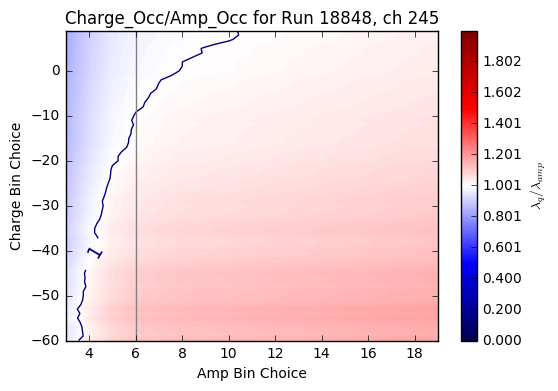


3it [00:20,  6.89s/it]
100%|██████████| 3/3 [01:02<00:00, 20.76s/it]


In [8]:
for runlist in tqdm(test_runlists):
    runs=file_to_list(runlist)
    for run, ch in tqdm(zip(runs, test_ch)):
        ratio_df=make_occ_ratio(run, ch, amp_vals, q_vals)
        X, Y=np.meshgrid(amp_vals, q_vals)

        cl=plt.contour(X,Y, ratio_df.values, levels=[1])#, norm=MidpointNormalize(midpoint=1))
        plt.clabel(cl, fmt = '%2.1d', fontsize=14)
        cp=plt.contourf(X,Y,ratio_df.values, levels=np.linspace(0,2,1000), cmap='seismic', vmin=0, vmax=2)
        plt.colorbar(cp,label='$\lambda_q/\lambda_{amp}$')
        plt.axvline(x=6, color='gray')
        plt.xlabel("Amp Bin Choice")
        plt.ylabel("Charge Bin Choice")
        plt.title('Charge_Occ/Amp_Occ for Run %d, ch %d' %(run, ch))
        plt.show()

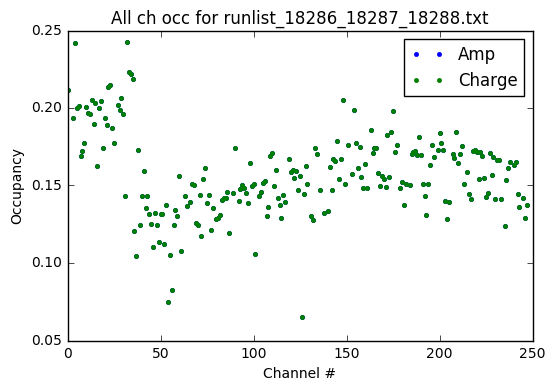

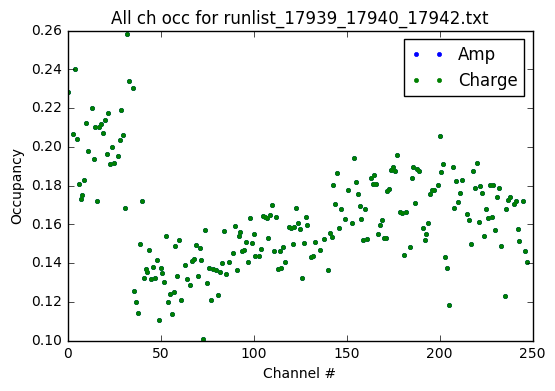

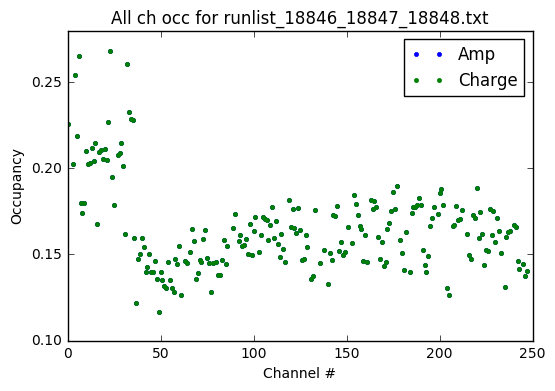

In [9]:
def plot_occ_rl(runlist):
    aoc=amp_on_ch[runlist]
    qoc=q_on_ch[runlist]
    plt.figure()
    plt.plot(aoc, amp_occ_df.loc[aoc,runlist], linestyle='None', marker='.', label="Amp")
    plt.plot(qoc, q_occ_df.loc[qoc, runlist], linestyle='None', marker='.', label="Charge")
    #plt.errorbar(aoc, amp_occ_df.loc[aoc,runlist], yerr=[amp_occ_lerr_df.loc[aoc, runlist], amp_occ_uerr_df.loc[aoc, runlist]], linestyle='None', marker='.', label="Amp")
    #plt.errorbar(qoc, q_occ_df.loc[qoc, runlist], yerr=[q_occ_lerr_df.loc[qoc, runlist], q_occ_uerr_df.loc[qoc, runlist]], linestyle='None', marker='.', label="Charge")
    plt.xlabel('Channel #')
    plt.ylabel("Occupancy")
    plt.title("All ch occ for %s" %runlist)
    plt.legend()
    plt.show()
    
for runlist in test_runlists:
    plot_occ_rl(runlist)

runlist_18286_18287_18288.txt    0.211569
runlist_17939_17940_17942.txt    0.228220
runlist_18846_18847_18848.txt    0.225921
Name: 0, dtype: float64


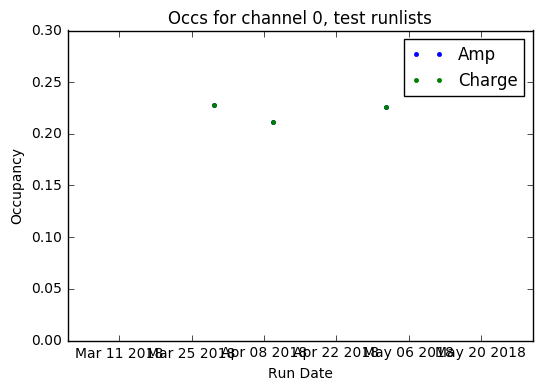

runlist_18286_18287_18288.txt    0.065228
runlist_17939_17940_17942.txt    0.132511
runlist_18846_18847_18848.txt    0.146515
Name: 126, dtype: float64


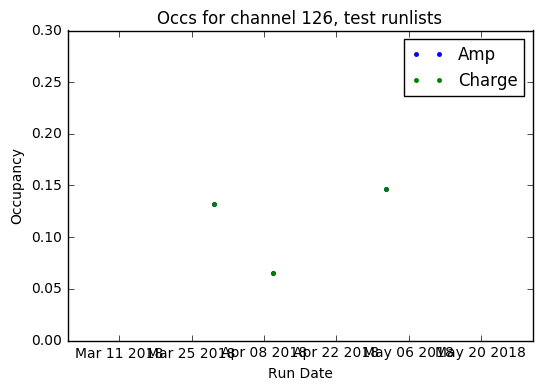

runlist_18286_18287_18288.txt    0.142056
runlist_17939_17940_17942.txt    0.172074
runlist_18846_18847_18848.txt    0.144633
Name: 245, dtype: float64


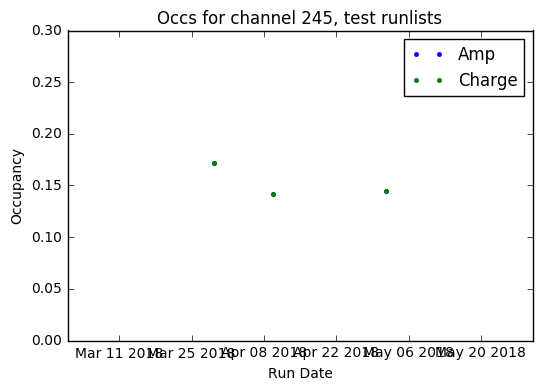

In [29]:
test_bot=[]
for rl in test_runlists:
    runs=file_to_list(rl)
    test_bot.append(runs[0])
dates = [get_run_time(run) for run in test_bot]

def plot_occ_ch(ch):
    print(amp_occ_df.loc[ch,test_runlists])
    plt.figure()
    plt.plot(dates, amp_occ_df.loc[ch,test_runlists], linestyle='None', marker='.', label='Amp')
    plt.plot(dates, q_occ_df.loc[ch,test_runlists], linestyle='None', marker='.', label="Charge")
    #plt.errorbar(dates, amp_occ_df.loc[ch,test_runlists], yerr=amp_occ_err_df.loc[ch,test_runlists],linestyle='None', marker='.', label='Amp')
    #plt.errorbar(dates, q_occ_df.loc[ch,test_runlists], yerr=q_occ_err_df.loc[ch,test_runlists], linestyle='None', marker='.', label="Charge")
    plt.title("Occs for channel %d, test runlists" %ch)
    plt.xlabel("Run Date")
    plt.ylabel("Occupancy")
    plt.xlim([datetime.date(2018, 3,1), datetime.date(2018,5, 30)])
    plt.ylim(0,0.3)
    plt.legend()
    plt.show()
    
for ch in test_ch:
    plot_occ_ch(ch)

### Histograms

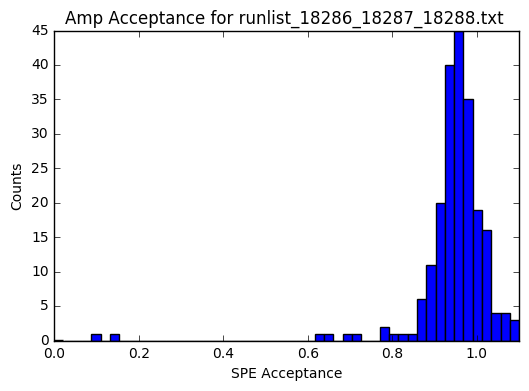

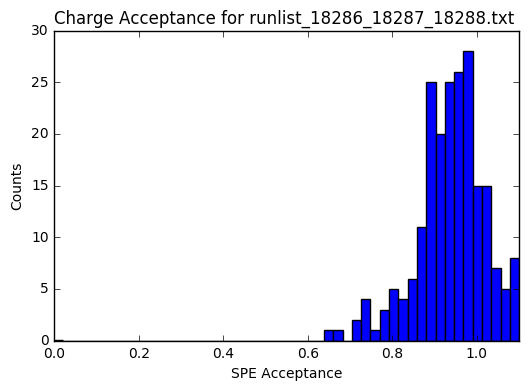

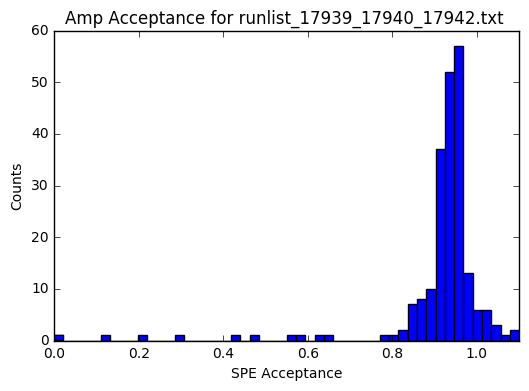

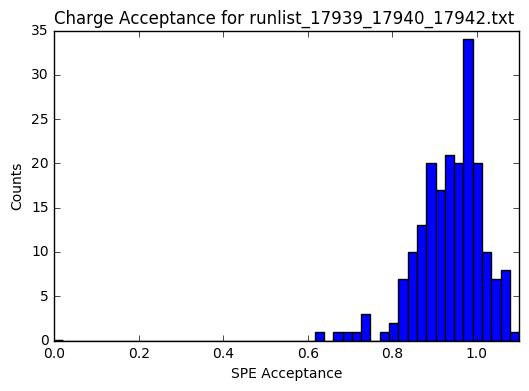

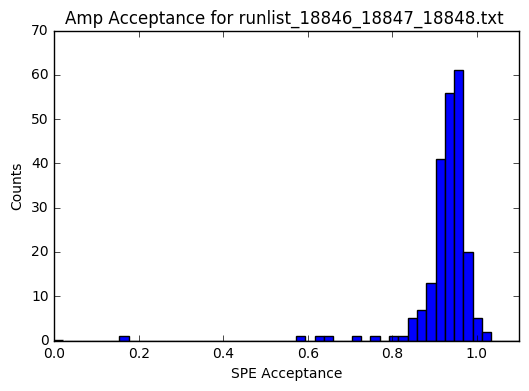

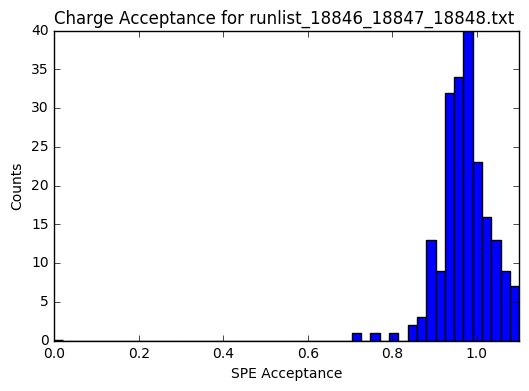

In [30]:
#plot the acceptance of one runlist
for runlist in test_runlists:
    qoc=q_on_ch[runlist]
    aoc=amp_on_ch[runlist]
    plt.hist(amp_acc_df.loc[aoc, runlist], bins=50, range=(0,1.1))
    plt.title("Amp Acceptance for %s " %runlist)
    plt.xlabel("SPE Acceptance")
    plt.ylabel("Counts")
    plt.xlim(0, 1.1)
    plt.show()
    
    plt.hist(q_acc_df.loc[qoc,runlist], bins=50, range=(0,1.1))
    plt.title("Charge Acceptance for %s " %runlist)
    plt.xlabel("SPE Acceptance")
    plt.ylabel("Counts")
    plt.xlim(0, 1.1)
    plt.show()

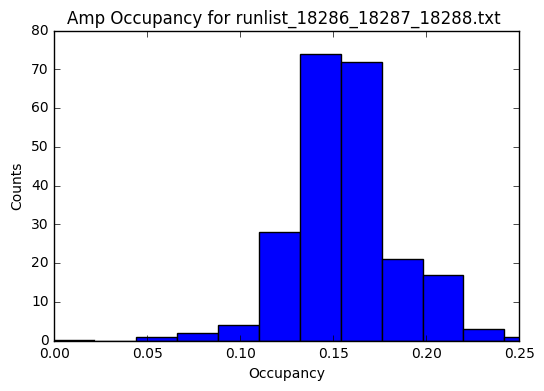

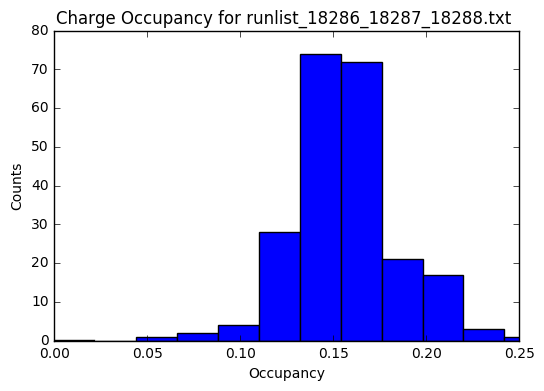

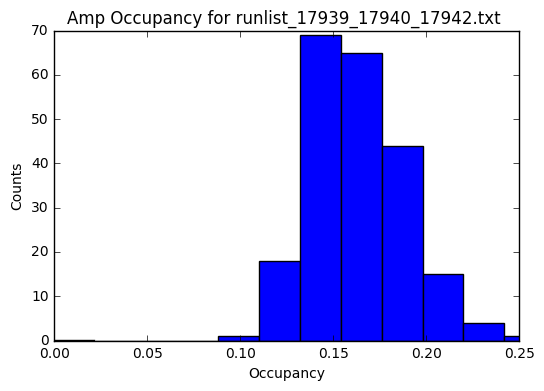

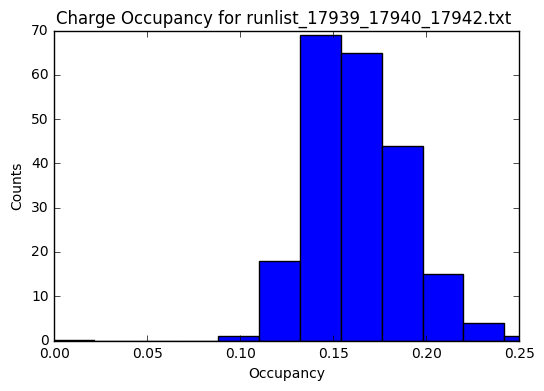

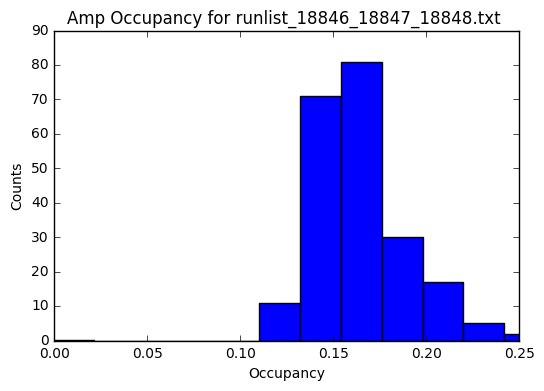

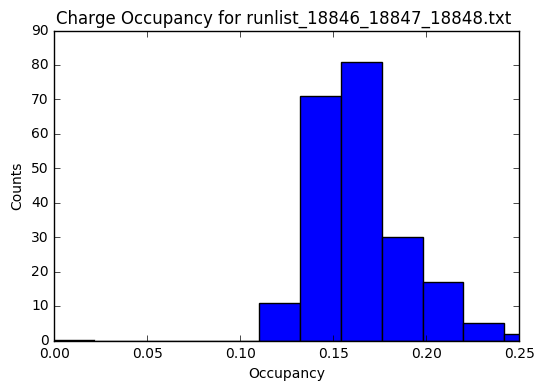

In [31]:
#plot the occupancy of one runlist
for runlist in test_runlists:
    qoc=q_on_ch[runlist]
    aoc=amp_on_ch[runlist]
    plt.hist(amp_occ_df.loc[aoc,runlist], bins=50, range=(0,1.1))
    plt.title("Amp Occupancy for %s " %runlist)
    plt.xlabel("Occupancy")
    plt.ylabel("Counts")
    plt.xlim(0,0.25)
    plt.show()
    
    plt.hist(q_occ_df.loc[qoc,runlist], bins=50, range=(0,1.1))
    plt.title("Charge Occupancy for %s " %runlist)
    plt.xlabel("Occupancy")
    plt.ylabel("Counts")
    plt.xlim(0,0.25)
    plt.show()

### Time Evo for single channels

In [32]:
import matplotlib.dates as mdates
from dateutil.relativedelta import relativedelta
import datetime

months = mdates.MonthLocator()
years = mdates.YearLocator()
datetimefmt = mdates.DateFormatter("%d-%m")


#dates = [get_run_time(run) for run in bottom_runs]
today = datetime.date.today()


def plot_channel(ch):
    f, ax = plt.subplots(figsize=(8,5))
    ax.fmt_xdata = mdates.DateFormatter('%d-%m')
    ax.errorbar(dates, q_acc_df.loc[ch,test_runlists], yerr=[q_acc_lerr_df.loc[ch, test_runlists], q_acc_uerr_df.loc[ch,test_runlists]], linestyle='None', 
                color='navy', marker='.', label='Charge')
    ax.errorbar(dates, amp_acc_df.loc[ch,test_runlists], yerr=[amp_acc_lerr_df.loc[ch, test_runlists], amp_acc_uerr_df.loc[ch,test_runlists]], linestyle='None', 
                color='r', marker='.', label="Amplitude")
    ax.xaxis.set_major_formatter(datetimefmt)
    ax.xaxis.set_major_locator(months)
    plt.xlabel('Date')
    plt.ylabel('SPE Acceptance')
    plt.title('Channel %d' %ch)
    plt.legend()
    f.autofmt_xdate()
    plt.grid()
    plt.ylim(-0.1, 1.1)
    plt.xlim(datetime.date(year=2018, month=1, day=1), datetime.date(year=2018, month=5, day=1) )
    #plt.savefig('plots/ch%d.png' % ch)
    plt.show()

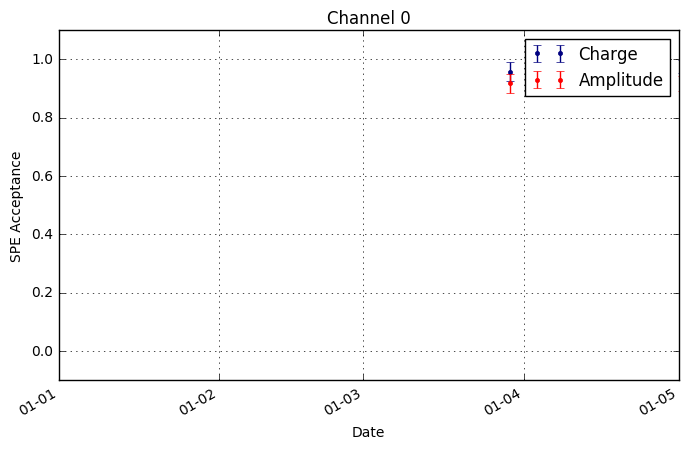

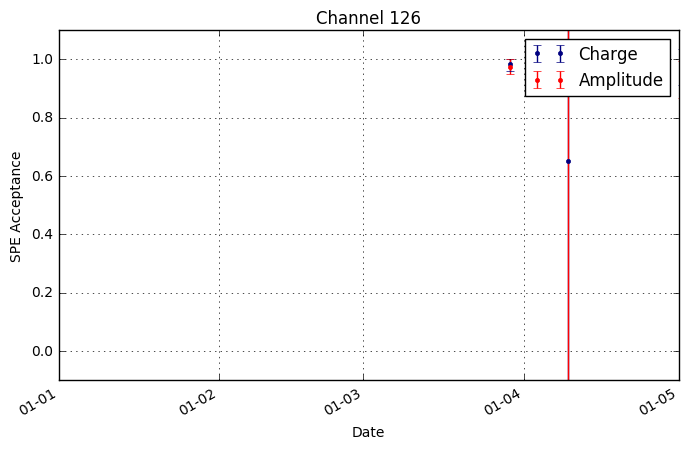

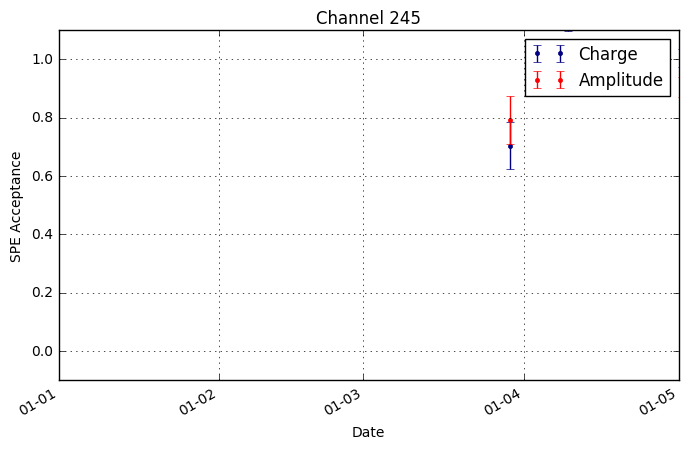

In [33]:
for ch in test_ch:
    plot_channel(ch)